# Linear Regression Model

In [1]:
import torch
from matplotlib import pyplot as plt

# Create the tensors x and y. They are the training
# examples in the dataset for the Linear regression
x = torch.tensor(
[12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 19.4, 15.5, 16.7, 17.3, 18.4, 19.2,
 17.4, 19.5, 19.7, 21.2])
y = torch.tensor(
[11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6, 16.9, 14.0, 14.6, 15.1, 16.1, 16.8,
 15.2, 17.0, 17.2, 18.6])

# The parameters to be learnt w, and b in the
# prediction y_p = wx +b
b= torch.rand([1], requires_grad=True)
w= torch.rand ([1], requires_grad=True)
print("The parameters are {}, and {}".format(w, b))

# The Learning rate is set to alpha = 0.001 
learning_rate = torch.tensor(0.001)

# The List of Loss values for the plotting purpose 
loss_list = []

The parameters are tensor([0.3882], requires_grad=True), and tensor([0.0040], requires_grad=True)


The parameters are w=tensor([0.6908], requires_grad=True), b=tensor([0.0210], requires_grad=True), and loss=73.73162841796875
The parameters are w=tensor([0.8049], requires_grad=True), b=tensor([0.0275], requires_grad=True), and loss=10.482089042663574
The parameters are w=tensor([0.8478], requires_grad=True), b=tensor([0.0299], requires_grad=True), and loss=1.5010334253311157
The parameters are w=tensor([0.8640], requires_grad=True), b=tensor([0.0308], requires_grad=True), and loss=0.22577528655529022
The parameters are w=tensor([0.8701], requires_grad=True), b=tensor([0.0312], requires_grad=True), and loss=0.04469658434391022
The parameters are w=tensor([0.8724], requires_grad=True), b=tensor([0.0313], requires_grad=True), and loss=0.018984422087669373
The parameters are w=tensor([0.8733], requires_grad=True), b=tensor([0.0314], requires_grad=True), and loss=0.015333249233663082
The parameters are w=tensor([0.8736], requires_grad=True), b=tensor([0.0314], requires_grad=True), and los

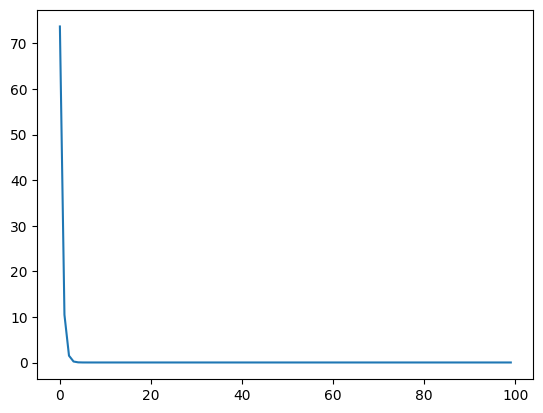

In [2]:
# Run the training Loop for N epochs 
for epochs in range(100):
    # Compute the average Loss for the training samples 
    loss = 0.0
    # Accumulate the Loss for all the samples
    for j in range(len(x)):
        a = w * x[j]
        y_p = a + b
        loss +=(y_p-y[j]) ** 2
    # Find the average Loss
    loss = loss / len(x)
    # Add the Loss to a list for the plotting purpose 
    loss_list.append(loss.item())
    # Compute the gradients using backward
    # dl/dw and dl/db
    loss.backward()
    # Without modifying the gradient in this block
    # perform the operation
    with torch.no_grad():
        # Update the weight based on gradient descent
        # equivalently one may write w1.copy_(w1 - Learning_rate✶ w1.grad) 
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
    # reset the gradients for next epoch
    w.grad.zero_()
    b.grad.zero_()
    # w.grad = None
    # b.grad = None
    # prev_Loss = Loss
    # Display the parameters and Loss
    print("The parameters are w={}, b={}, and loss={}".format(w, b, loss.item()))
# Display the plot
plt.plot(loss_list)
plt.show()

# Linear Regression Model by defining a User Defined Class titled `RegressionModel` 

In [3]:
class RegressionModel:
    def __init__(self):
        self.w = torch.rand([1], requires_grad=True)
        self.b = torch.rand([1], requires_grad=True)
    def forward(self, x):
        return self.w * x + self.b
    def update(self):
        # Update the weight based on gradient descent
        # equivalently one may write w1.copy_(w1 - learning_rate * w1.grad)
        self.w -= learning_rate * self.w.grad
        self.b -= learning_rate * self.b.grad

    def reset_grad (self):
        self.w.grad.zero_()
        self.b.grad.zero_()

def criterion(yj, y_p):
    return (yj - y_p)**2

The parameters are w=tensor([0.7308], requires_grad=True), b=tensor([0.1185], requires_grad=True), and loss=41.75503158569336
The parameters are w=tensor([0.8166], requires_grad=True), b=tensor([0.1233], requires_grad=True), and loss=5.94056510925293
The parameters are w=tensor([0.8489], requires_grad=True), b=tensor([0.1252], requires_grad=True), and loss=0.8551235198974609
The parameters are w=tensor([0.8611], requires_grad=True), b=tensor([0.1259], requires_grad=True), and loss=0.1330212652683258
The parameters are w=tensor([0.8657], requires_grad=True), b=tensor([0.1261], requires_grad=True), and loss=0.03048652596771717
The parameters are w=tensor([0.8674], requires_grad=True), b=tensor([0.1262], requires_grad=True), and loss=0.015926972031593323
The parameters are w=tensor([0.8681], requires_grad=True), b=tensor([0.1263], requires_grad=True), and loss=0.013859566301107407
The parameters are w=tensor([0.8683], requires_grad=True), b=tensor([0.1263], requires_grad=True), and loss=0

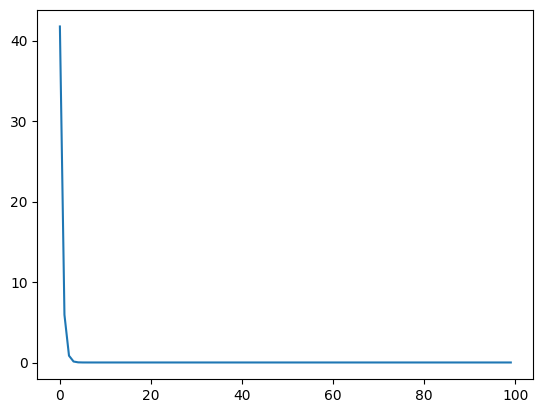

In [4]:
model = RegressionModel()

# The list of loss values for the plotting purpose
loss_list = []

# Run the training loop for N epochs
for epochs in range(100):
    loss = 0.0
    # Accumulate the loss for all the samples
    for j in range(len(x)):
        y_p = model.forward (x[j])
        loss += criterion(y[j], y_p)
    # Find the average loss
    loss = loss / len(x)
    # Add the loss to a list for the plotting purpose
    loss_list.append(loss.item())

    # Compute the gradients using backward dl/dw and d/db 
    loss.backward()

    # Without modifying the gradient in this block
    # perform the operation
    with torch.no_grad():
        model.update()
    # reset the gradients for next epoch
    model.reset_grad()
    # w.grad = None
    # b.grad = None

    # prev_loss = loss
    # Display the parameters and loss
    print("The parameters are w={}, b={}, and loss={}".format(model.w, model.b, loss.item()))
    
# Display the plot
plt.plot(loss_list)
plt.show()